# MCPneurons

In [19]:
import numpy as np

class Perceptron(object):
    def __init__(self, eta=0.01, n_iters = 50, random_state = 1):
        self.eta = eta
        self.n_iters = n_iters
        self.random_state  = random_state

    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state) # 난수 고정
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        # bias를 포함해야하니 X.shape에 1 더할것.
        self.errors_ = []

        for _ in range(self.n_iters):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
            # 선형 가중치 업데이트를 코드로 구현

        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0] # input과 가중치 내적을 통해 출력값 구하기

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [20]:
import os
import pandas as pd
s = os.path.join('https://archive.ics.uci.edu', 'ml', 'machine-learning-databases', 'iris', 'iris.data')
print('URL:',s)

URL: https://archive.ics.uci.edu\ml\machine-learning-databases\iris\iris.data


In [21]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header = None, encoding = 'utf-8')
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [22]:
import matplotlib.pyplot as plt
y = df.iloc[0:100, 4].values # 초기 0~100개의 데이터 부르기
y = np.where(y == 'Iris-setosa', -1, 1)

In [23]:
X = df.iloc[0:100, [0, 2]].values

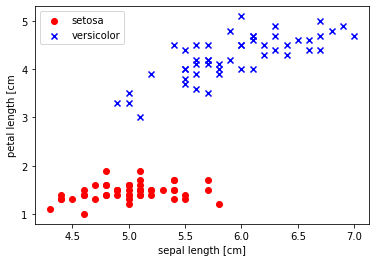

In [24]:
plt.scatter(X[:50, 0], X[:50, 1], color = 'red', marker='o', label = 'setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='x', label = 'versicolor')
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm')
plt.legend(loc='upper left')
plt.show()

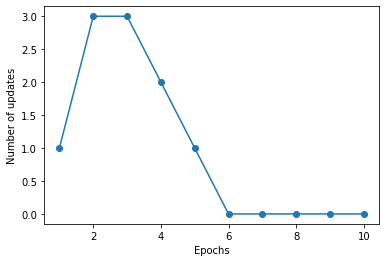

In [25]:
ppn = Perceptron(eta=0.1, n_iters=10)
ppn.fit(X, y)
plt.plot(range(1, len(ppn.errors_)+1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()

In [26]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, resolution = 0.2):
    markers = ['s', 'x', 'o', '^', 'v']
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    x1_min, x1_max = X[:, 0].min() - 1, X[:,0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:,1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=colors[idx], marker=markers[idx], label = cl, edgecolors='black')

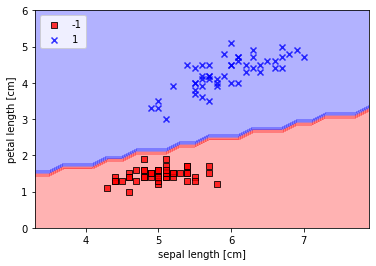

In [27]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

# Adaline GD

In [28]:
class AdalineGD(object):
    def __init__(self, eta = 0.01, n_iters = 50, random_state = 1):
        self.eta = eta
        self.n_iters = n_iters
        self.random_state = random_state

    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1+X.shape[1])
        self.cost_ = []

        for i in range(self.n_iters):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = y - output
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        return X

    def predict(self, X):
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

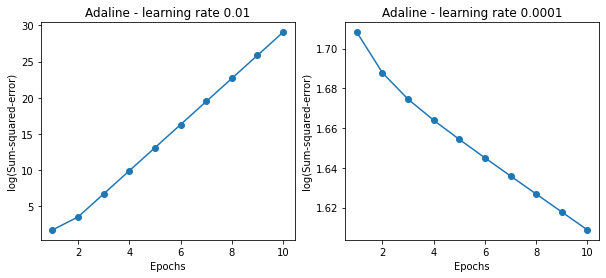

In [29]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (10, 4))
ada1 = AdalineGD(n_iters=10, eta = 0.01).fit(X, y)
ax[0].plot(range(1, len(ada1.cost_) + 1), np.log10(ada1.cost_), marker = 'o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline - learning rate 0.01')

ada2 = AdalineGD(n_iters=10, eta=0.0001).fit(X, y)
ax[1].plot(range(1, len(ada2.cost_) + 1), np.log10(ada2.cost_), marker = 'o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('log(Sum-squared-error)')
ax[1].set_title('Adaline - learning rate 0.0001')
plt.show()

# Gradient Descent with Standardizaton

In [30]:
X_std = np.copy(X)
X_std[:, 0] = (X[:,0] - X[:,0].mean()) / X[:,0].std()
X_std[:, 1] = (X[:,1] - X[:,1].mean()) / X[:,1].std()

In [31]:
ada_gd = AdalineGD(n_iters=15, eta = 0.01)
ada_gd.fit(X_std, y)

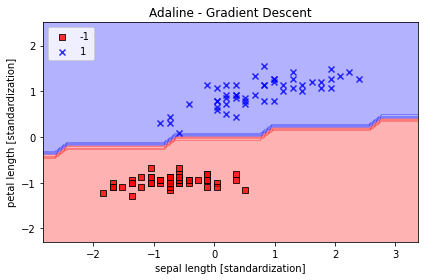

In [32]:
plot_decision_regions(X_std, y, classifier=ada_gd)
plt.title('Adaline - Gradient Descent')
plt.xlabel('sepal length [standardization]')
plt.ylabel('petal length [standardization]')
plt.legend(loc = 'upper left')
plt.tight_layout()
plt.show()

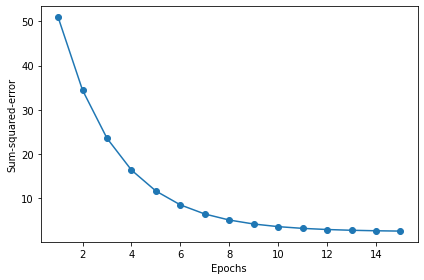

In [33]:
plt.plot(range(1, len(ada_gd.cost_) + 1), ada_gd.cost_, marker = 'o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')
plt.tight_layout()
plt.show()

# Stochastic Gradient descent

In [34]:
class AdalineSGD(object):
    def __init__(self, eta = 0.01, n_iters = 50, random_state = None, shuffle = True):
        self.eta = eta
        self.n_iters = n_iters
        self.w_initialized = False
        self.shuffle = shuffle
        self.random_state = random_state

    def fit(self, X, y):
        self._initialize_weights(X.shape[1])
        self.cost_ = []
        for i in range(self.n_iters):
            if self.shuffle:
                X, y = self._shuffle(X, y)
            cost = []
            for xi, target in zip(X, y):
                cost.append(self._update_weights(xi, target))
            avg_cost = sum(cost) / len(y)
            self.cost_.append(avg_cost)
        return self

    def partial_fit(self, X, y):
        if not self.w_initialized:
            self._initialize_weights(X.shape[1])
        if y.ravel().shape[0] > 1:
            for xi, target in zip(X, y):
                self._update_weights(xi, target)
        else:
            self._update_weights(X, y)
        return self

    def _shuffle(self, X, y):
        r = self.rgen.permutation(len(y))
        return X[r], y[r]

    def _initialize_weights(self, m):
        self.rgen = np.random.RandomState(self.random_state)
        self.w_ = self.rgen.normal(loc=0.0, scale=0.01, size = 1 +m)
        self.w_initialized = True

    def _update_weights(self, xi, target):
        output = self.activation(self.net_input(xi))
        error = target - output
        self.w_[1:] += self.eta * xi.dot(error)
        self.w_[0] += self.eta * error
        cost = 0.5*error**2
        return cost

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        return X

    def predict(self, X):
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

In [35]:
ada_sgd = AdalineSGD(n_iters=15, eta=0.01, random_state=1)
ada_sgd.fit(X_std, y)

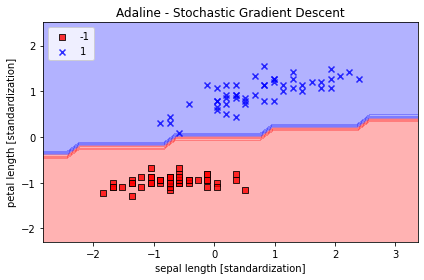

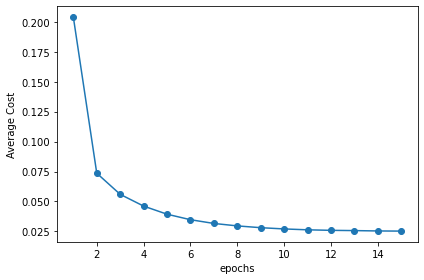

In [36]:
plot_decision_regions(X_std, y, classifier=ada_sgd)
plt.title('Adaline - Stochastic Gradient Descent')
plt.xlabel('sepal length [standardization]')
plt.ylabel('petal length [standardization]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()
plt.plot(range(1, len(ada_sgd.cost_) + 1), ada_sgd.cost_, marker = 'o')
plt.xlabel('epochs')
plt.ylabel('Average Cost')
plt.tight_layout()
plt.show()